# This is a simple example for using mermaid

In [2]:
# First do all the necessary imports
%matplotlib inline

# If a higher resolution output is desired
#import matplotlib as mpl
#mpl.rc("savefig", dpi=150)

import numpy as np
import matplotlib.pyplot as plt

import mermaid.simple_interface as SI
import mermaid.example_generation as EG
import mermaid.module_parameters as pars
import mermaid.utils as utils
import mermaid.visualize_registration_results as vizreg
import torch

# keep track of general parameters
params = pars.ParameterDict()

use_mermaid_net:False
reg_factor_in_mermaid:1.0


In [3]:
# Get an example image pair
I0,I1,spacing = EG.CreateRealExampleImages(dim=2).create_image_pair()

INFO: Image WAS intensity normalized when loading: [0.0,1.367119]
INFO: Normalizing the spacing to [0,1] in the largest dimension. (Turn normalize_spacing off if this is not desired.)
Normalize spacing: [2. 2. 2.] -> [0.00787402 0.00787402 0.00787402]
Normalize spacing, extent: [  0. 254. 254.] -> [0. 1. 1.]
Normalize spacing: [2. 2.] -> [0.00787402 0.00787402]
Normalize spacing, extent: [254. 254.] -> [1. 1.]
INFO: Image WAS intensity normalized when loading: [0.0,1.4618253]
INFO: Normalizing the spacing to [0,1] in the largest dimension. (Turn normalize_spacing off if this is not desired.)
Normalize spacing: [2. 2. 2.] -> [0.00787402 0.00787402 0.00787402]
Normalize spacing, extent: [  0. 254. 254.] -> [0. 1. 1.]
Normalize spacing: [2. 2.] -> [0.00787402 0.00787402]
Normalize spacing, extent: [254. 254.] -> [1. 1.]


In [4]:
# print possible model names
SI.RegisterImagePair().print_available_models()


Known registration models are:
------------------------------
                              affine_map: map-based affine registration
                           diffusion_map: displacement-based diffusion registration
                           curvature_map: displacement-based curvature registration
                     total_variation_map: displacement-based total variation registration
                                 svf_map: map-based stationary velocity field
                               svf_image: image-based stationary velocity field
               svf_scalar_momentum_image: image-based stationary velocity field using the scalar momentum
                 svf_scalar_momentum_map: map-based stationary velocity field using the scalar momentum
               svf_vector_momentum_image: image-based stationary velocity field using the vector momentum
                 svf_vector_momentum_map: map-based stationary velocity field using the vector momentum
                      lddmm_s

Creating new category: root.model
Creating new category: root.model.deformation
Creating key = use_map; category = root.model.deformation; value = True
Creating new category: root.model.registration_model
Creating key = type; category = root.model.registration_model; value = lddmm_shooting_scalar_momentum_map
Creating new category: root.optimizer
Creating new category: root.optimizer.single_scale
Creating key = nr_of_iterations; category = root.optimizer.single_scale; value = 20
Creating new category: root.model.registration_model.similarity_measure
Creating key = sigma; category = root.model.registration_model.similarity_measure; value = 0.01
Creating key = map_low_res_factor; category = root.model.deformation; value = 0.25
Overwriting key = use_map; category = root.model.deformation; value =  True -> True
Overwriting key = map_low_res_factor; category = root.model.deformation; value =  0.25 -> 0.25
Using default value = False for key = compute_similarity_measure_at_low_res of categor

/Users/mn/PycharmProjects/mermaid/mermaid/custom_pytorch_extensions.py:281: RuntimeWarning: invalid value encountered in multiply
  conv_output = self.ifftn(self.fftn(input.detach().cpu().numpy()) * self.complex_fourier_filter)


Found UNACCEPTABLE step: new alpha_k = 0.0078125
Found UNACCEPTABLE step: new alpha_k = 0.00390625
Found UNACCEPTABLE step: new alpha_k = 0.001953125
Found UNACCEPTABLE step: new alpha_k = 0.0009765625
Found UNACCEPTABLE step: new alpha_k = 0.00048828125
Found UNACCEPTABLE step: new alpha_k = 0.000244140625
Found UNACCEPTABLE step: new alpha_k = 0.0001220703125
Found UNACCEPTABLE step: new alpha_k = 6.103515625e-05
Found UNACCEPTABLE step: new alpha_k = 3.0517578125e-05
Iter     0: E=[115.861404], simE=[115.861374], regE=3.3210824767593294e-05, optParE=[0.], relF=n/a 
   / image: E=[115.861404], simE=[115.861374], regE=3.3210824767593294e-05


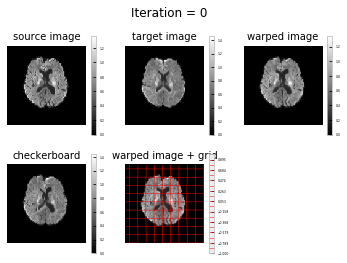

Iter     1: E=[108.96978], simE=[108.96976], regE=2.2185042325872928e-05, optParE=[0.], relF=[0.06266835] 
   / image: E=[108.96978], simE=[108.96976], regE=2.2185042325872928e-05
Iter     2: E=[107.52848], simE=[107.52846], regE=2.396699164819438e-05, optParE=[0.], relF=[0.01328038] 
   / image: E=[107.52848], simE=[107.52846], regE=2.396699164819438e-05
Iter     3: E=[106.05637], simE=[106.05633], regE=4.853282371186651e-05, optParE=[0.], relF=[0.01375076] 
   / image: E=[106.05637], simE=[106.05633], regE=4.853282371186651e-05
Iter     4: E=[103.57053], simE=[103.570496], regE=3.797260069404729e-05, optParE=[0.], relF=[0.0237719] 
   / image: E=[103.57053], simE=[103.570496], regE=3.797260069404729e-05
Iter     5: E=[101.72991], simE=[101.72987], regE=4.081305451109074e-05, optParE=[0.], relF=[0.0179171] 
   / image: E=[101.72991], simE=[101.72987], regE=4.081305451109074e-05


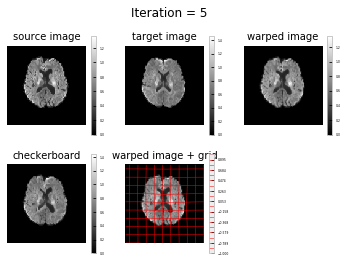

Iter     6: E=[99.45819], simE=[99.45813], regE=6.084773121983744e-05, optParE=[0.], relF=[0.0226136] 
   / image: E=[99.45819], simE=[99.45813], regE=6.084773121983744e-05
Iter     7: E=[98.61619], simE=[98.61611], regE=7.951780571602285e-05, optParE=[0.], relF=[0.00845247] 
   / image: E=[98.61619], simE=[98.61611], regE=7.951780571602285e-05
Iter     8: E=[97.95377], simE=[97.9537], regE=7.952017040224746e-05, optParE=[0.], relF=[0.00669418] 
   / image: E=[97.95377], simE=[97.9537], regE=7.952017040224746e-05
Iter     9: E=[97.23663], simE=[97.23656], regE=7.915734022390097e-05, optParE=[0.], relF=[0.00730013] 
   / image: E=[97.23663], simE=[97.23656], regE=7.915734022390097e-05
Iter    10: E=[96.9233], simE=[96.92322], regE=8.262217306764796e-05, optParE=[0.], relF=[0.00319977] 
   / image: E=[96.9233], simE=[96.92322], regE=8.262217306764796e-05


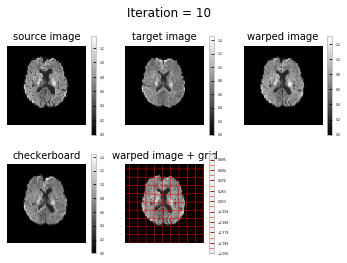

Iter    11: E=[96.70141], simE=[96.701324], regE=8.518461982021108e-05, optParE=[0.], relF=[0.00227114] 
   / image: E=[96.70141], simE=[96.701324], regE=8.518461982021108e-05
Iter    12: E=[96.08864], simE=[96.08855], regE=9.364986181026325e-05, optParE=[0.], relF=[0.00631145] 
   / image: E=[96.08864], simE=[96.08855], regE=9.364986181026325e-05
Iter    13: E=[95.33203], simE=[95.33192], regE=0.00011468999582575634, optParE=[0.], relF=[0.00785416] 
   / image: E=[95.33203], simE=[95.33192], regE=0.00011468999582575634
Iter    14: E=[93.93623], simE=[93.93608], regE=0.00015571665426250547, optParE=[0.], relF=[0.01470248] 
   / image: E=[93.93623], simE=[93.93608], regE=0.00015571665426250547
Iter    15: E=[91.682915], simE=[91.6827], regE=0.00021395448129624128, optParE=[0.], relF=[0.02431213] 
   / image: E=[91.682915], simE=[91.6827], regE=0.00021395448129624128


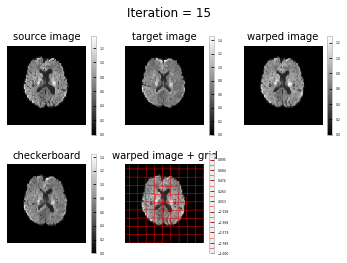

Found UNACCEPTABLE step: new alpha_k = 0.5
Iter    16: E=[91.57168], simE=[91.571335], regE=0.0003467157657723874, optParE=[0.], relF=[0.00120163] 
   / image: E=[91.57168], simE=[91.571335], regE=0.0003467157657723874
Iter    17: E=[88.429924], simE=[88.429634], regE=0.0002913939824793488, optParE=[0.], relF=[0.0351309] 
   / image: E=[88.429924], simE=[88.429634], regE=0.0002913939824793488
Found UNACCEPTABLE step: new alpha_k = 0.5
Iter    18: E=[88.04217], simE=[88.04188], regE=0.00029319003806449473, optParE=[0.], relF=[0.00435475] 
   / image: E=[88.04217], simE=[88.04188], regE=0.00029319003806449473
Iter    19: E=[86.94843], simE=[86.94813], regE=0.0003076583379879594, optParE=[0.], relF=[0.01243609] 
   / image: E=[86.94843], simE=[86.94813], regE=0.0003076583379879594


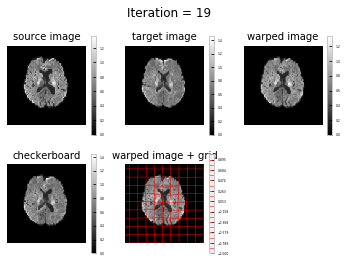

('time:', 44.24939322471619)


In [5]:
reg = SI.RegisterImagePair()
reg.register_images(I0, I1, spacing, model_name='lddmm_shooting_scalar_momentum_map',
                                      nr_of_iterations=20,visualize_step=5,map_low_res_factor=0.25,
                                      similarity_measure_sigma=0.01)

In [6]:
reg.get_energy()

(86.94843292236328, 86.94812774658203, 0.0003076583379879594)

In [7]:
phi = reg.get_map()

In [10]:
I0_warped = utils.compute_warped_image_multiNC(torch.from_numpy(I0), phi, spacing, spline_order=1)

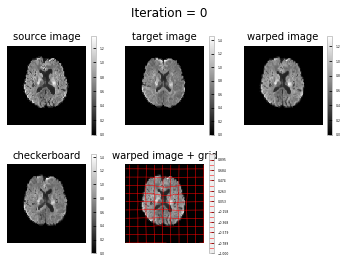

In [11]:
vizreg.show_current_images(0, torch.from_numpy(I0),
                           torch.from_numpy(I1),
                           I0_warped, phiWarped=phi)